In [1]:
import sys
import pathlib

In [2]:
sys.path.append(str(pathlib.Path.cwd().parent))

In [3]:
sys.path

['/Users/huydg/Documents/huydg/ml_framework/exploration',
 '/Users/huydg/anaconda3/lib/python37.zip',
 '/Users/huydg/anaconda3/lib/python3.7',
 '/Users/huydg/anaconda3/lib/python3.7/lib-dynload',
 '',
 '/Users/huydg/anaconda3/lib/python3.7/site-packages',
 '/Users/huydg/PycharmProjects/MTI/new_clone/ailabo_ocr_insurance',
 '/Users/huydg/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/Users/huydg/.ipython',
 '/Users/huydg/Documents/huydg/ml_framework']

In [4]:
from src import feature_generator, numerical, categorical, dispatcher, cross_validation, utils, visualize

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
train_csv = pd.read_csv(dispatcher.SAMPLE_TRAIN_PATH)

In [7]:
train_csv.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


In [8]:
train_csv_nonan = train_csv.loc[~train_csv.isna().any(axis=1)]

In [9]:
train_csv.shape

(600000, 25)

In [10]:
train_csv_nonan.shape

(298042, 25)

In [11]:
train_csv_nonan.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
6,6,0.0,0.0,0.0,F,N,Red,Triangle,Hamster,Costa Rica,...,4d3766412,1.0,Grandmaster,Cold,c,R,rg,5.0,6.0,0
7,7,0.0,0.0,1.0,T,N,Red,Triangle,Axolotl,Finland,...,a651dec43,3.0,Expert,Cold,b,Y,PS,1.0,1.0,0
10,10,0.0,0.0,1.0,T,Y,Blue,Triangle,Hamster,Finland,...,9bfe3ee22,1.0,Novice,Hot,b,O,hG,7.0,5.0,1
11,11,0.0,0.0,1.0,F,Y,Red,Square,Hamster,Costa Rica,...,6c73b62e4,1.0,Contributor,Hot,b,M,xF,2.0,8.0,0


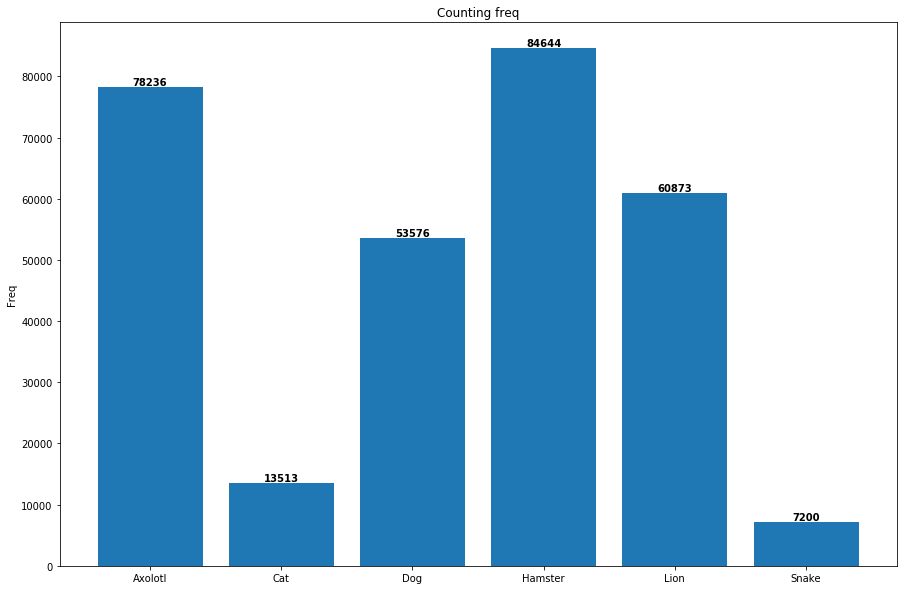

In [19]:
fig = plt.figure(figsize=(15, 10))
visualize.bar_plot_from_col(train_csv_nonan[['nom_2']], bar_ylabel='Freq', bar_title='Counting freq',)

In [20]:
train_csv_nonan.dtypes

id          int64
bin_0     float64
bin_1     float64
bin_2     float64
bin_3      object
bin_4      object
nom_0      object
nom_1      object
nom_2      object
nom_3      object
nom_4      object
nom_5      object
nom_6      object
nom_7      object
nom_8      object
nom_9      object
ord_0     float64
ord_1      object
ord_2      object
ord_3      object
ord_4      object
ord_5      object
day       float64
month     float64
target      int64
dtype: object

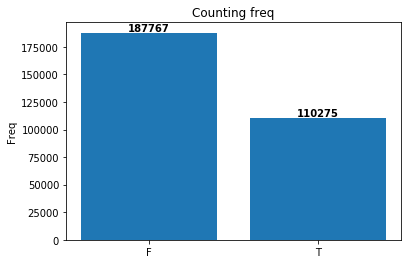

In [21]:
visualize.bar_plot_from_col(train_csv_nonan[['bin_3']], bar_ylabel='Freq', bar_title='Counting freq',)

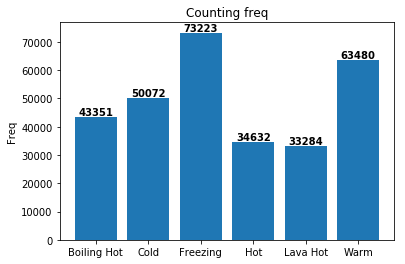

In [29]:
visualize.bar_plot_from_col(train_csv_nonan[['ord_2']], bar_ylabel='Freq', bar_title='Counting freq',)

In [28]:
train_csv_nonan['ord_2'].value_counts()

Freezing       73223
Warm           63480
Cold           50072
Boiling Hot    43351
Hot            34632
Lava Hot       33284
Name: ord_2, dtype: int64